# Homework 5

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

This import didn't work so I ran this, downloaded the data from a github then just dropped the data into the empty folder that this created and it runs. 

## 1. Use PCA to reduce the dimensionality

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [3]:

X, y = make_regression(n_features=100, n_samples=1000, effective_rank=20)
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [4]:
X_2dim.shape

(1000, 2)

In [5]:
pca.explained_variance_ratio_

array([ 0.03600417,  0.03573886])

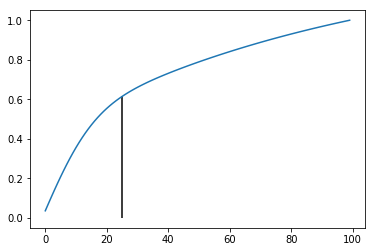

In [6]:

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[25],x=25)

a. How many components did you use? Why?

Personally I like 25 components because it explains about 60 percent of the data and it looks like it is at a point where our graph is getting less steep. Granted if you want to target a specific percentage this is easily enough to find. For example if you need 80% you would want 52 components. 

In [7]:
index_80 = np.argmax(cum_ratio >= 0.80)
print(index_80)
print(cum_ratio[index_80])

52
0.800395240776


b. Plot the first two components. Do you notice any trends? What is this plot showing us?

I do not notice any trends. Everything seems to be all over the plance. Yellow I guess tends to be in the upper right side but that is about all I see for trends. I guess dark blue tends to be in the middle too. 

Text(0.5,1,'First Two Components')

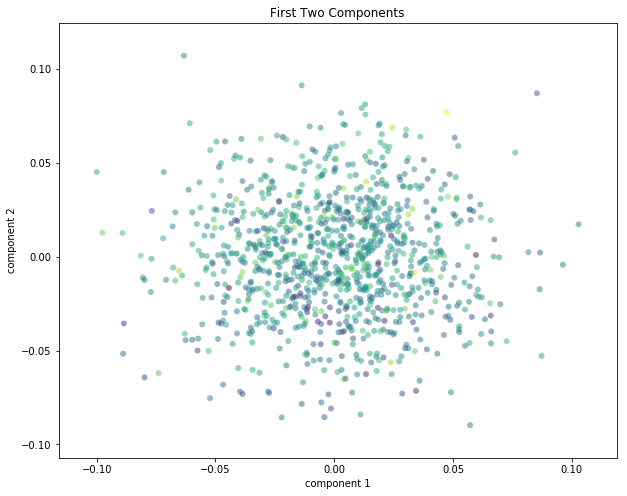

In [8]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

f, ax = plt.subplots(figsize= (10,8))
plt.scatter(X_2dim[:,0], X_2dim[:,1], c=y, edgecolor= 'none', alpha=.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First Two Components')

c. Why would you use PCA? What is it doing? And what are the drawbacks?

You use PCA to reduce the dimensionality of your data. There are some models that run into problems with high dimensional data. These models typically are using distance of somekind to work and so when you are in super high dimensions nothing is close together. PCA is taking your features and turning them into components that maximize the variance so that you have as much information as possible to sort your data out while using fewwer components. Some drawbacks of using PCA is that you may reduce your data too much and then lose any power to solve problems. Another problem is that you may lose ability to understand what your model is actually doing. You lose interpritability. Also, as was mentioned in class, there are better compression methonds that don't lose as much data now. 

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [9]:
mnist = fetch_mldata("MNIST original")
x = mnist.data 
y = mnist.target

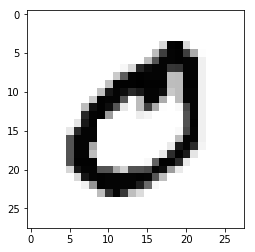

In [10]:
zero=plt.imshow(x[1].reshape((28,28)), cmap='Greys')

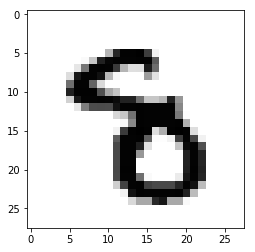

In [11]:
plt.imshow(x[50000].reshape((28,28)), cmap='Greys')

In [12]:

pca=PCA(n_components= 64)
x_pca=pca.fit_transform(x)


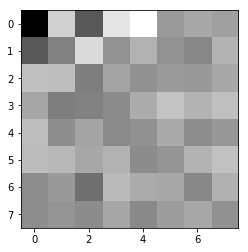

In [13]:
plt.imshow(x_pca[1].reshape((8,8)), cmap='Greys')

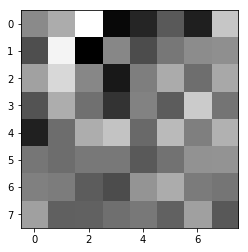

In [14]:
plt.imshow(x_pca[50000].reshape((8,8)), cmap='Greys')

As you can see, even when I reduce it to 64 components it is not possible to see what the numbers are. 

## 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

In [15]:
from sklearn.manifold import TSNE
import seaborn as sns
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [16]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 16.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.923240
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.462379
[t-SNE] Error after 1000 iterations: 1.676797


In [17]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'t-SNE')

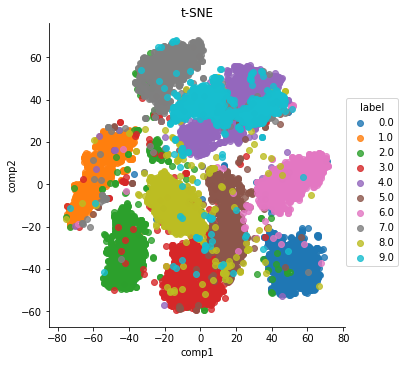

In [18]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

a. How does this plot differ from your PCA plot?

This plot did a much clearer job of clustering data and differentiating it from other data. Most are clumped together in masses of their true color with just a few random dots of color here and there. 

b. How robust is it to changes in perplexity?

In [19]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.460713
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.448654
[t-SNE] Error after 1000 iterations: 1.051585


In [20]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'t-SNE')

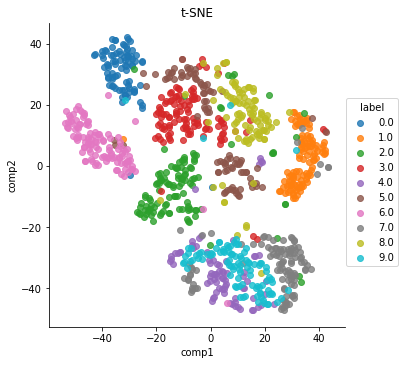

In [21]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

In [22]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.971151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.440331
[t-SNE] Error after 1000 iterations: 1.025121


In [23]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'t-SNE')

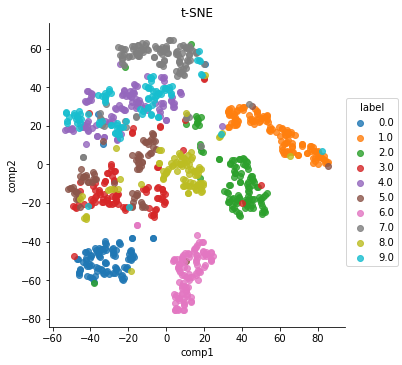

In [24]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

In [25]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.635394
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.526588
[t-SNE] Error after 1000 iterations: 1.064683


In [26]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'t-SNE')

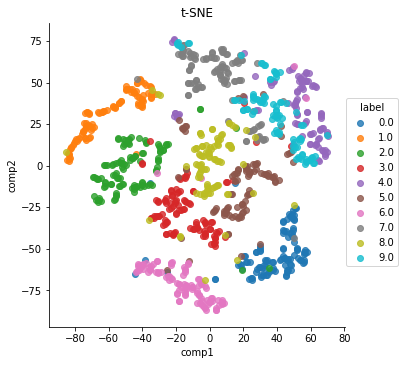

In [27]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

I dropped to samples of 1000 because 10000 was taking a long time to run through so some of the difference in my plots can be attributed to that. In general though as we drop perplexity the clusters were still visable, but were a bit more spread out. 

## c. How robust is it to different learning rate and number of iterations?

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.786854
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.918137
[t-SNE] Error after 1000 iterations: 0.975607


Text(0.5,1,'t-SNE')

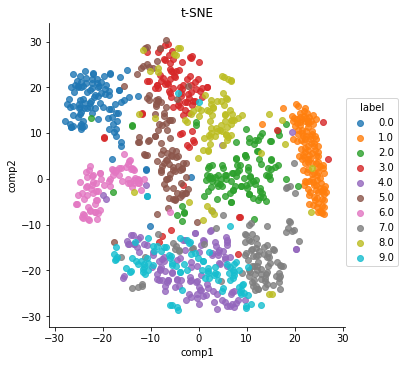

In [28]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 0.204s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.769001
[t-SNE] KL divergence after 50 iterations with early exaggeration: 63.968353
[t-SNE] Error after 1000 iterations: 0.963539


Text(0.5,1,'t-SNE')

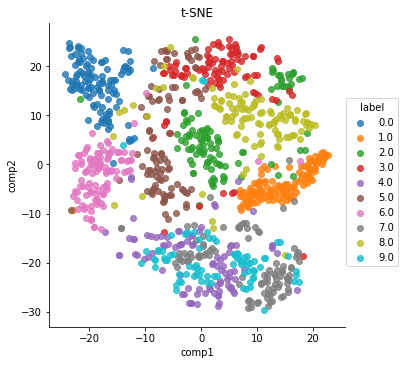

In [29]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=10)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.786181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.269012
[t-SNE] Error after 500 iterations: 1.061575


Text(0.5,1,'t-SNE')

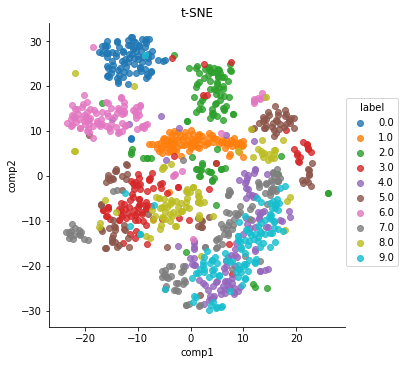

In [30]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.781479
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.242897
[t-SNE] Error after 350 iterations: 1.031108


Text(0.5,1,'t-SNE')

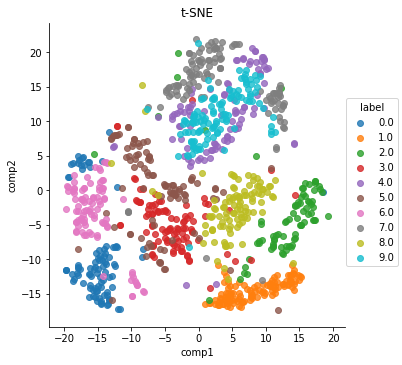

In [31]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=350, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE')

It's interesting, changing learning rate and iterations has a small impact on the shape of clusters. No clusters are nearly as well defined as our first map, but you can still see where clusters are. In the graph just above the green cluster has been split into two along with the yellow. 

## Perform k-means clustering:

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
X, y = make_regression(n_features=100, n_samples=1000, effective_rank=20)
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [34]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X_2dim)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
labels = kmeans.labels_
silhouette_score(X_2dim, labels, metric='euclidean')

0.32965815927697317

Note: When I tried to run K-means clustering through with all the data it eats up all the memory and crashes my computer. So I decided to use PCA to simplify the data. This ran K-means clustering through with no problem, but I ran into problems with my labeling for ploting the data. So my tsne plot does not have color labels which I realize makes it less useful. 

a. How did you choose k?

This dataset is of numbers which are 0-9. This would naturally mean there are 10 groups. So a K of 10 makes a lot of sense for this problem. 

b. How did you evaluate your clustering?

I am using the silhouette score to evaluate the clustering. The score ranges from -1 to 1 and the closer to 1 you are the more dense the clusters are and the more seperated the clusters are from each other. This metric is good becuase it requires no previous knowledge about the problem at hand. While we do know quite a bit about the nature of our data now, this is not always true. 

c. Visualize your clusters using t-sne

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.574198
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.730164
[t-SNE] Error after 1000 iterations: 1.030911


Text(0.5,1,'K-Means Clustering')

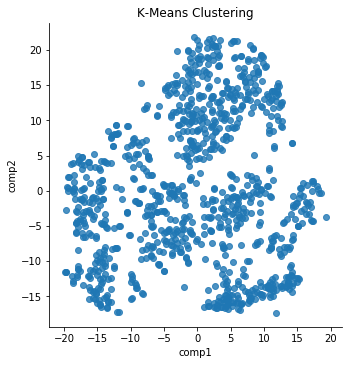

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])


sns.lmplot(x='comp1', y='comp2', data=df_tsne, fit_reg=False)
plt.title('K-Means Clustering')

d. Did you scale your data?

I did not scale my data. The features in this model are pretty close to one another so I didn't feel that the data needed to be scaled. Again we know quite a bit about the nature of this data. In other problems where this is not the case we would need to be more careful. 

e. How robust is your clustering?

From our silhouette_score we could still do better on clustering our data, but from the graphical standpoint it looks like we did a pretty good job. It's difficult to say which method did the best job and. Clearly the best was when we were taking a sample of 10000, but I just don't have the computing power to run with that through all iterations. 

## 4. Perform hierarchical clustering:

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
x_cluster = x[:75]

a. Plot your dendrogram

Text(0.5,1,'Dendrogram: Complete')

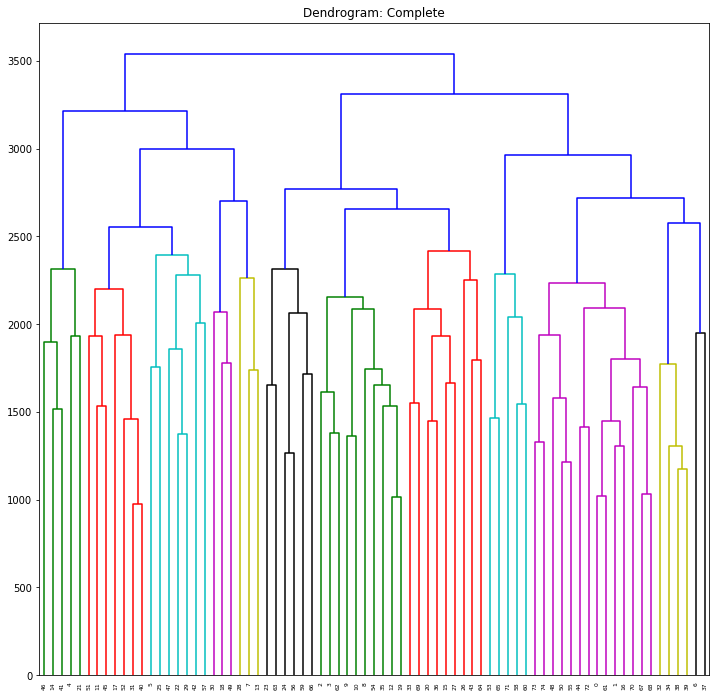

In [39]:
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Complete')

b. How many clusters seem reasonable based off your graph?

Just above the 2500 mark there is a nice line that would give us 10 clusters but anywhere from 8-12 would appear to be reasonable. I might just be looking for there to be 10 clusters though because that is what I would expect to see with this dataset. 

c. How does your dendrogram change with different linkage methods?

Text(0.5,1,'Dendrogram: Single')

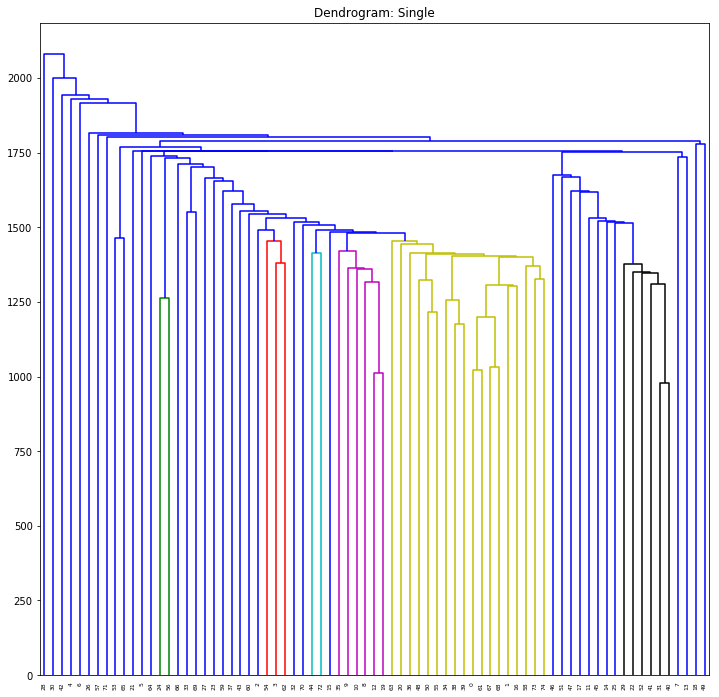

In [40]:
Z = linkage(x_cluster, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Single')

Text(0.5,1,'Dendrogram: Average')

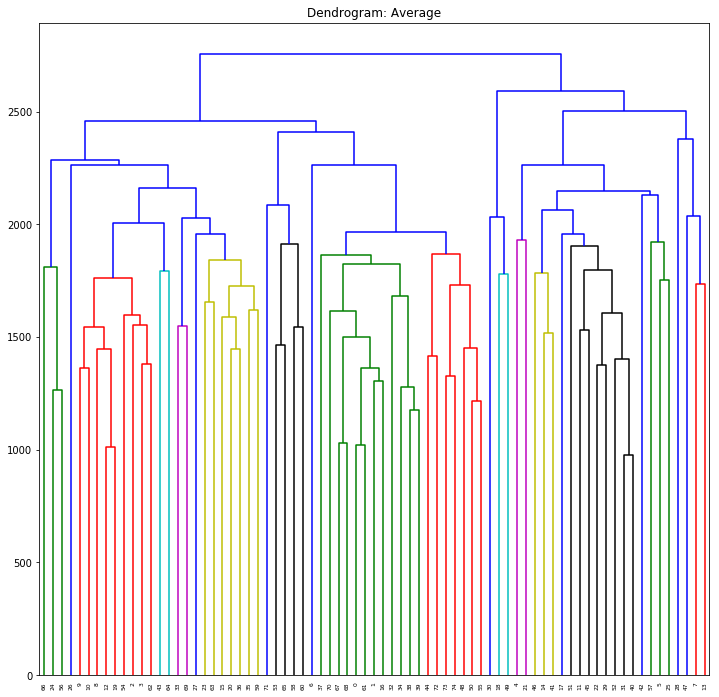

In [41]:
Z = linkage(x_cluster, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Average')

Text(0.5,1,'Dendrogram: Weighted')

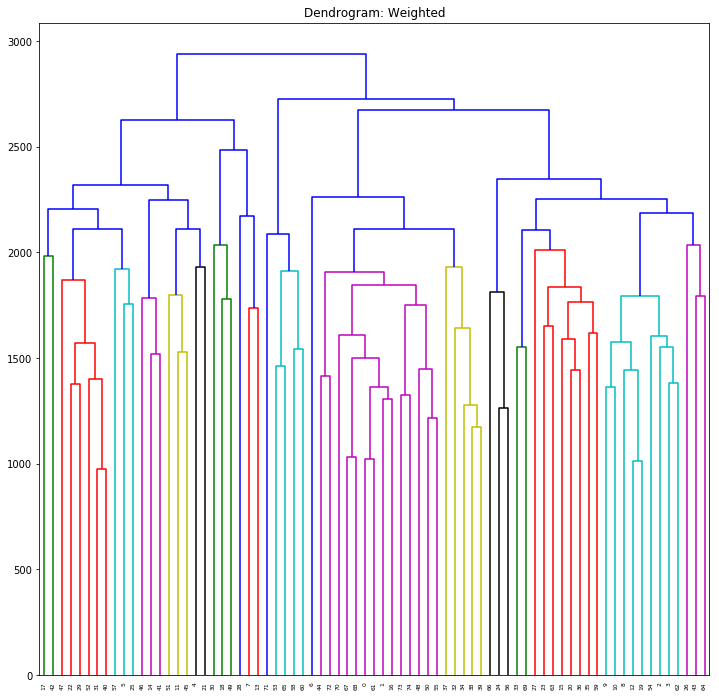

In [42]:
Z = linkage(x_cluster, 'weighted')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Weighted')

Text(0.5,1,'Dendrogram: Centroid')

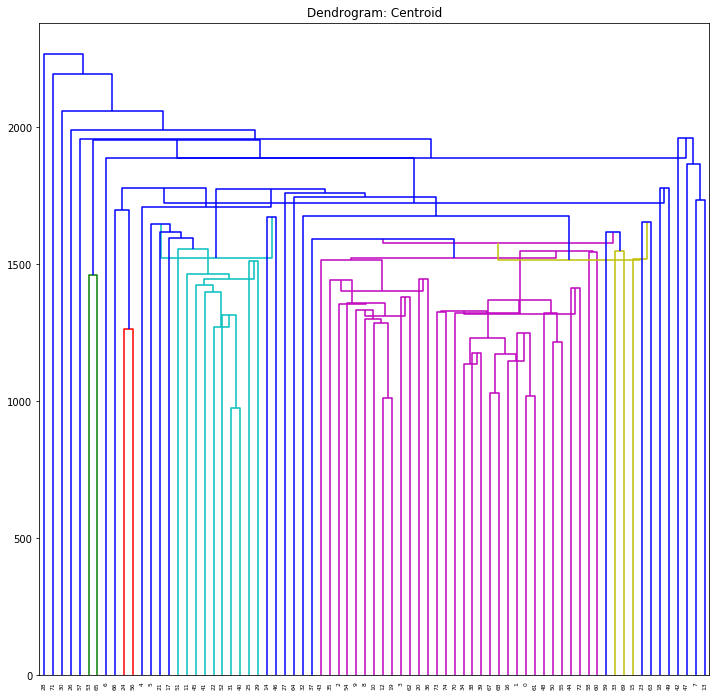

In [43]:
Z = linkage(x_cluster, 'centroid')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Centroid')

Text(0.5,1,'Dendrogram: Median')

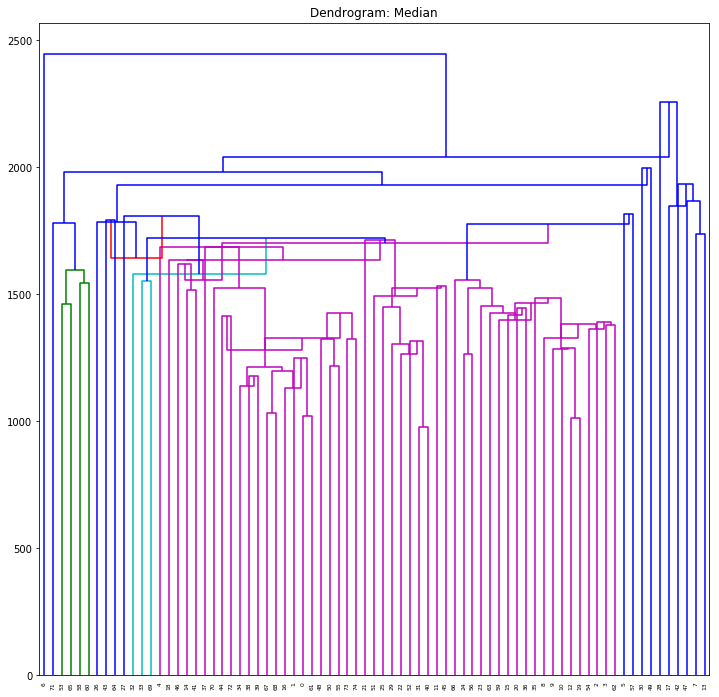

In [44]:
Z = linkage(x_cluster, 'median')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Median')

Text(0.5,1,'Dendrogram: Ward')

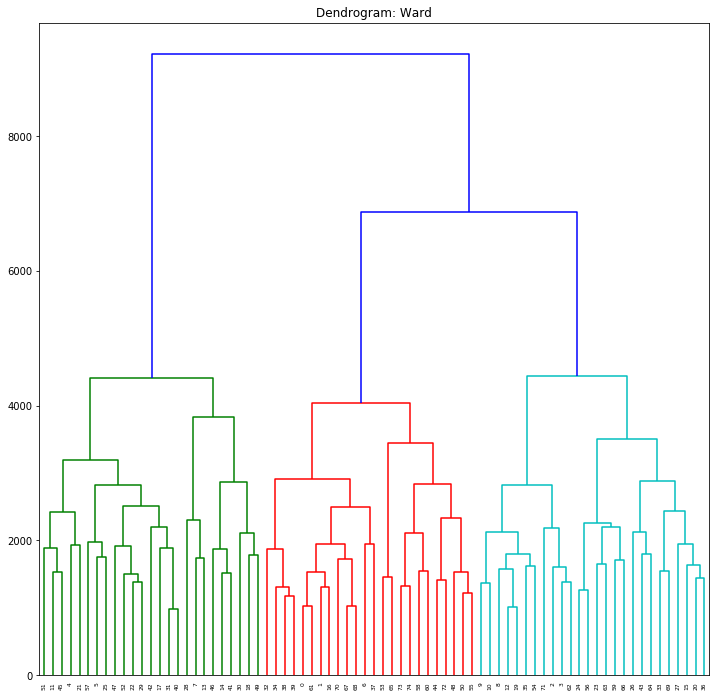

In [45]:
Z = linkage(x_cluster, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Dendrogram: Ward')

The dendrogram changes quite a bit with different linkage methods. Ward looks like it might be the best one because it seems balanced and not too crazy. About halfway between 2000 and 4000 mark there is a clear space with 10 clusters which would match our problme well. Average also does not look too bad either. 